In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [44]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

C:\Users\shrav\AppData\Local\Temp\ipykernel_8692\2194379965.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [45]:
data.reset_index(inplace=True)

In [46]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475197,16.543039,16.152333,16.166447,147611217
1,2012-01-04,16.546259,16.595036,16.356602,16.465791,114989399
2,2012-01-05,16.316736,16.439543,16.247905,16.393986,131808205
3,2012-01-06,16.094152,16.341251,16.088457,16.320205,108119746
4,2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.746803,96.645521,93.384904,94.975448,26452900
2757,2022-12-15,90.661095,93.474374,89.895648,92.987272,28298800
2758,2022-12-16,90.323105,91.207845,89.478129,90.661092,48485500


In [47]:
ma_100_days = data.Close.rolling(100).mean()

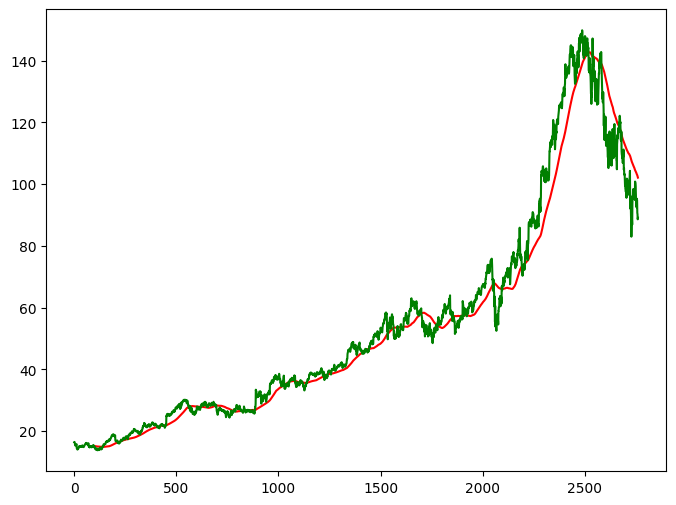

In [48]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [49]:
ma_200_days = data.Close.rolling(200).mean()

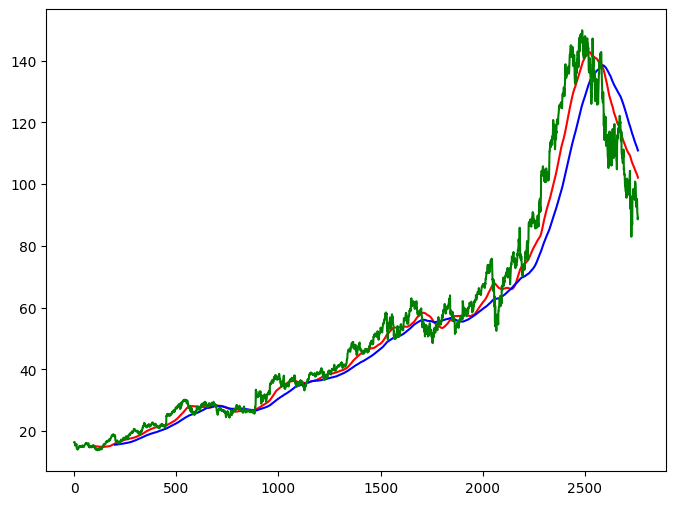

In [50]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [51]:
data.dropna(inplace=True)

In [52]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [53]:
data_train.shape[0]

2208

In [54]:
data_test.shape[0]

553

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [56]:
data_train_scale = scaler.fit_transform(data_train)

In [57]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [58]:
x, y = np.array(x), np.array(y)

In [59]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [60]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\shrav\OneDrive\Desktop\STOCK PROJECT\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [62]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - loss: 0.0764
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 0.0073
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0076
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0062
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - loss: 0.0049
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 0.0053
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.0043
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0046
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 0.0045
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 0.0036
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0033
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0035
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0045
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0031
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - l

In [63]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [64]:
pas_100_days = data_train.tail(100)

In [65]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [66]:
data_test_scale  =  scaler.fit_transform(data_test)

In [67]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [68]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step


In [69]:
scale =1/scaler.scale_

In [70]:
y_predict = y_predict*scale

In [71]:
y = y*scale

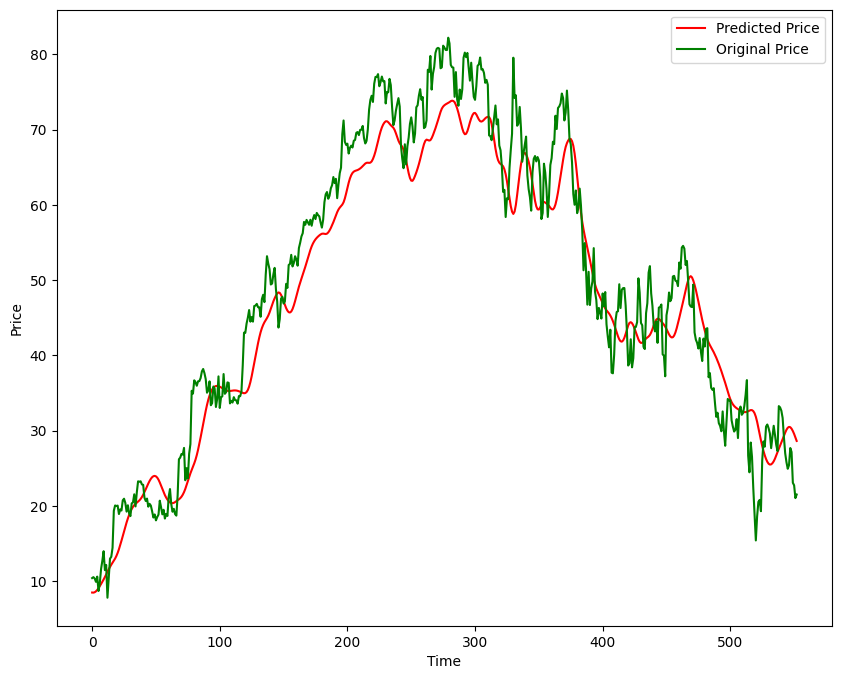

In [72]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [73]:
model.save('Stock Predictions Model.keras')